In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

#Create Data Frame

<bound method NDFrame.head of      09V  10V  11V  12V  13V  14V  15V  16V  17V  18V  ...  36V  37V  38V  \
0      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
1      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
2      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
3      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
4      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
5      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
6      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
7      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
8      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
9      1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
10     1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
11     1    1    1    1    0    0    0    0   

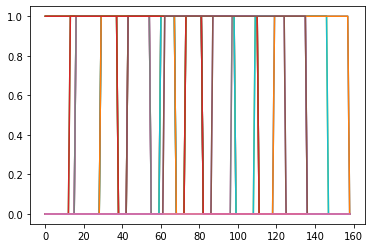

In [138]:
df_TestCar1=pd.read_csv('Data/testcar1.csv')

df_BaseLine=pd.read_csv('Data/BaseLineData.csv')

dframe=pd.read_csv('Data/System_Validation_Features.csv')
df=dframe.loc[:,'09V':'Coulombs']
df_msk = df.copy()
df.loc[:,:]=0
n_features=df.columns.size
n_samples=df.index.size

# set all values less than 5 to 0
cond1 = df_msk > 5
df_msk = df_msk.where(cond1,0)
# set all values greater than 0 to 1
cond2 = df_msk < 1
df_msk = df_msk.where(cond2,1)
print(df_msk.head)

for i in range(df.columns.size):
    plt.plot(df.index,df_msk.iloc[:,i])
    
plt.show()

In [139]:
Area_SPs=[0]*14

Area_SPs[0]=200
Area_SPs[1]=200
Area_SPs[2]=200
Area_SPs[3]=220
Area_SPs[4]=230
Area_SPs[5]=240
Area_SPs[6]=250
Area_SPs[7]=265
Area_SPs[8]=265
Area_SPs[9]=265
Area_SPs[10]=265
Area_SPs[11]=265
Area_SPs[12]=290
Area_SPs[13]=290

for i in range(0,4):
    df.iloc[:,i]=Area_SPs[2]#*n_samples

for i in range(4,8):
    df.iloc[:,i]=Area_SPs[3]
    
for i in range(8,12):
    df.iloc[:,i]=Area_SPs[4]
    
for i in range(12,16):
    df.iloc[:,i]=Area_SPs[5]

for i in range(16,20):
    df.iloc[:,i]=Area_SPs[6]

for i in range(20,24):
    df.iloc[:,i]=Area_SPs[7]
    
for i in range(24,26):
    df.iloc[:,i]=Area_SPs[8]

for i in range(26,28):
    df.iloc[:,i]=Area_SPs[9]

for i in range(28,30):
    df.iloc[:,i]=Area_SPs[10]

for i in range(30,32):
    df.iloc[:,i]=Area_SPs[11]

for i in range(32,34):
    df.iloc[:,i]=Area_SPs[12]

for i in range(34,36):
    df.iloc[:,i]=Area_SPs[13]

df.head()
df.shape
df=df*df_msk
df

,09V,10V,11V,12V,13V,14V,15V,16V,17V,18V,...,36V,37V,38V,39V,40V,41V,42V,43V,44V,Coulombs
0,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,200,200,200,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
filename_Model_AppAmps='201019_ECModel_AppAmps.pkl'
filename_Model_EffAmps='081019_ECModel_EffAmps.pkl'
model_AppAmps=load(filename_Model_AppAmps) #Quadratic Ridge model
model_EffAmps=load(filename_Model_EffAmps) #Quadratic equation model

In [141]:
df['Coulombs'] = 0.0
x=[0]*df.index.size
App_Amps=pd.Series(x)
for i in range(df.index.size): #calculate applied voltages & coulombs one line at a time
    df['Coulombs']=App_Amps.mul(2)
    df['Coulombs']=df['Coulombs'].fillna(0)
    df['Coulombs']=df['Coulombs'].cumsum()
    xtest=df.iloc[:(i+1),:].values #read features to a numpy array
    xtest.reshape((i+1),37) #reshape array (1 x n_features)
    y=model_AppAmps.predict(xtest) #using the model predict app for all IGBTs
    df_y=pd.DataFrame(data=y)
    #df_y[df_y < 0]=0
    App_Amps=df_y.sum(axis=1)

df['App_Amps']=App_Amps

In [142]:
dfx=df.loc[:,'Coulombs':'App_Amps']
dfx=dfx.reindex(columns=['App_Amps','Coulombs'])
xtest=dfx.values
xtest.reshape(159,2)
y=model_EffAmps.predict(xtest)
cols=['Front_A','Roof_A','RHWing_A','LHWing_A','Rear_A']
df_EffAmps=pd.DataFrame(data=y,columns=cols)
df_EffAmps['Front_Coulombs'] = df_EffAmps['Front_A'].cumsum()
df_EffAmps['Roof_Coulombs'] = df_EffAmps['Roof_A'].cumsum()
df_EffAmps['RHWing_Coulombs'] = df_EffAmps['RHWing_A'].cumsum()
df_EffAmps['LHWing_Coulombs'] = df_EffAmps['LHWing_A'].cumsum()
df_EffAmps['Rear_Coulombs'] = df_EffAmps['Rear_A'].cumsum()

coulombs= [df_EffAmps['Front_Coulombs'].sum(),
           df_EffAmps['Roof_Coulombs'].sum(),
           df_EffAmps['RHWing_Coulombs'].sum(),
           df_EffAmps['LHWing_Coulombs'].sum(),
           df_EffAmps['Rear_Coulombs'].sum()]

In [143]:
xtestcar=df_TestCar1.values
xtestcar.reshape(159,2)
y=model_EffAmps.predict(xtestcar)
cols=['Front_A','Roof_A','RHWing_A','LHWing_A','Rear_A']
df_EffAmps_testcar=pd.DataFrame(data=y,columns=cols)
df_EffAmps_testcar['Front_Coulombs'] = df_EffAmps_testcar['Front_A'].cumsum()
df_EffAmps_testcar['Roof_Coulombs'] = df_EffAmps_testcar['Roof_A'].cumsum()
df_EffAmps_testcar['RHWing_Coulombs'] = df_EffAmps_testcar['RHWing_A'].cumsum()
df_EffAmps_testcar['LHWing_Coulombs'] = df_EffAmps_testcar['LHWing_A'].cumsum()
df_EffAmps_testcar['Rear_Coulombs'] = df_EffAmps_testcar['Rear_A'].cumsum()

coulombs_testcar = [df_EffAmps_testcar['Front_Coulombs'].sum(),
           df_EffAmps_testcar['Roof_Coulombs'].sum(),
           df_EffAmps_testcar['RHWing_Coulombs'].sum(),
           df_EffAmps_testcar['LHWing_Coulombs'].sum(),
           df_EffAmps_testcar['Rear_Coulombs'].sum()]

In [144]:
df_BaseLine['Front_Coulombs'] = df_BaseLine['Front_A'].cumsum()
df_BaseLine['Roof_Coulombs'] = df_BaseLine['Roof_A'].cumsum()
df_BaseLine['RHWing_Coulombs'] = df_BaseLine['RHWing_A'].cumsum()
df_BaseLine['LHWing_Coulombs'] = df_BaseLine['LHWing_A'].cumsum()
df_BaseLine['Rear_Coulombs'] = df_BaseLine['Rear_A'].cumsum()

coulombs_BaseLine = [df_BaseLine['Front_Coulombs'].sum(),
           df_BaseLine['Roof_Coulombs'].sum(),
           df_BaseLine['RHWing_Coulombs'].sum(),
           df_BaseLine['LHWing_Coulombs'].sum(),
           df_BaseLine['Rear_Coulombs'].sum()]

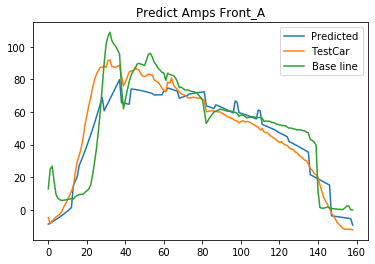

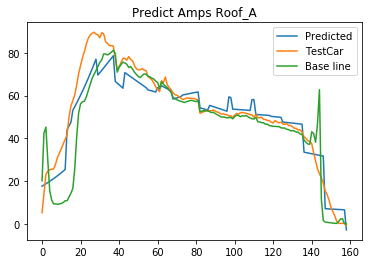

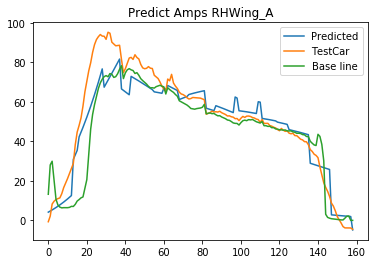

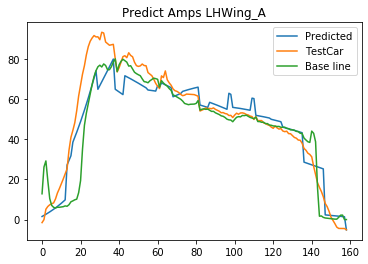

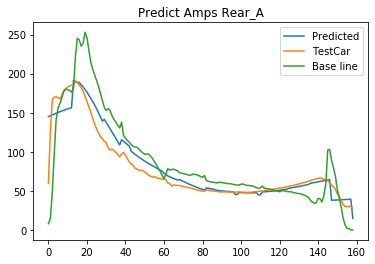

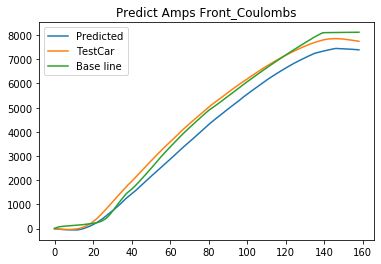

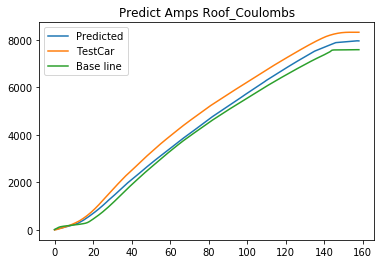

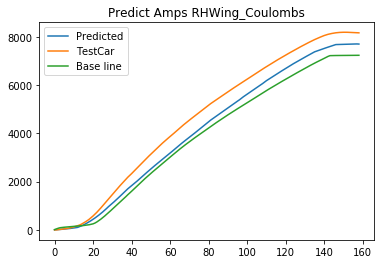

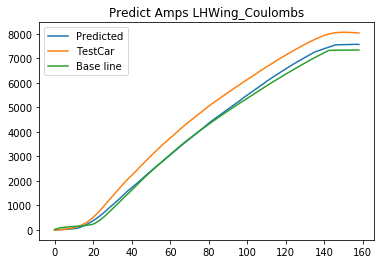

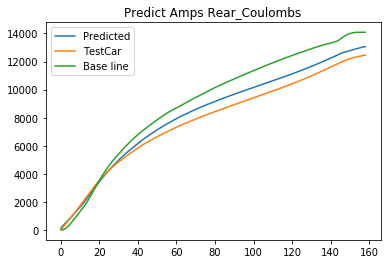

In [145]:
for i in range(df_EffAmps.columns.size):
    plt.plot(df_EffAmps.index,df_EffAmps.iloc[:,i],label='Predicted')
    plt.plot(df_EffAmps.index,df_EffAmps_testcar.iloc[:,i],label='TestCar')
    plt.plot(df_EffAmps.index,df_BaseLine.iloc[:,i+2],label='Base line')
    plt.title('Predict Amps %s' %df_EffAmps.columns[i])
    plt.legend()
    plt.show()

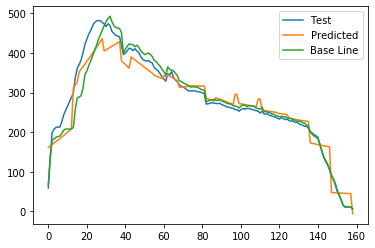

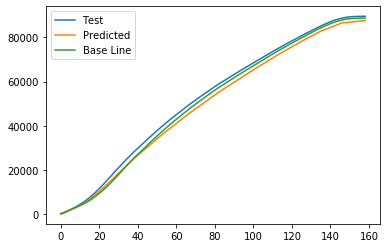

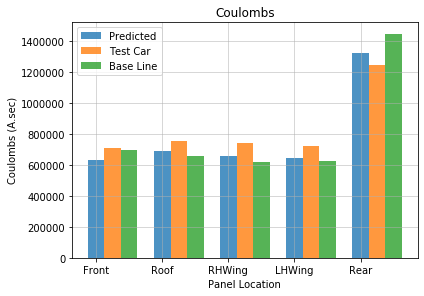

In [149]:
plt.plot(df.index,df_TestCar1['App_Amps'],label='Test')
plt.plot(df.index,df['App_Amps'],label='Predicted')
plt.plot(df.index,df_BaseLine['App_Amps'],label='Base Line')
plt.legend()
plt.show()

plt.plot(df.index,df_TestCar1['Coulombs'],label='Test')
plt.plot(df.index,df['Coulombs'],label='Predicted')
plt.plot(df.index,df_BaseLine['Coulombs'],label='Base Line')
plt.legend()
plt.show()


n_groups=5
bar_width = 0.25
opacity=0.8
index = np.arange(n_groups)
plt.bar(index,coulombs,bar_width,alpha=opacity,label='Predicted')
plt.bar(index+bar_width,coulombs_testcar,bar_width,alpha=opacity,label='Test Car')
plt.bar(index+2*bar_width,coulombs_BaseLine,bar_width,alpha=opacity,label='Base Line')
plt.legend()
plt.xlabel('Panel Location')
plt.ylabel('Coulombs (A.sec)')
plt.xticks(index, ('Front', 'Roof', 'RHWing', 'LHWing','Rear'))
plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Coulombs')
plt.show()